# hi

In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [6]:
df = pd.read_csv('data/mushrooms.csv')

In [7]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())
    print("\n")

---- class ---
e    4208
p    3916
Name: class, dtype: int64


---- cap-shape ---
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


---- cap-surface ---
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


---- cap-color ---
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64


---- bruises ---
f    4748
t    3376
Name: bruises, dtype: int64


---- odor ---
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64


---- gill-attachment ---
f    7914
a     210
Name: gill-attachment, dtype: int64


---- gill-spacing ---
c    6812
w    1312
Name: gill-spacing, dtype: int64


---- gill-size ---
b    5612
n    2512
Name: gill-size, dtype: int64


---- gill-color ---
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-

In [17]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

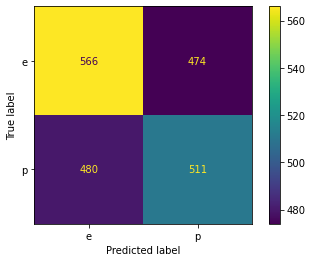

In [37]:
baseline = DummyClassifier(random_state=42)
baseline.fit(X_train, y_train)

plot_confusion_matrix(baseline, X_test, y_test);

In [63]:
baseline_accuracy = accuracy_score(y_test, baseline.predict(X_test))
baseline_recall = recall_score(y_test, baseline.predict(X_test),pos_label="e")
baseline_precision = precision_score(y_test, baseline.predict(X_test),pos_label="e")
baseline_f1 = f1_score(y_test, baseline.predict(X_test),pos_label="e")

In [44]:
print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f} 
Recall
Baseline: {baseline_recall:1.3f} 
Precision
Baseline: {baseline_precision:1.3f} 
F1 Score
Baseline: {baseline_f1:1.3f} 
""")



Accuracy
Baseline: 0.530 
Recall
Baseline: 0.544 
Precision
Baseline: 0.541 
F1 Score
Baseline: 0.543 



In [57]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

X_train_enc = ohe.fit_transform(X_train)

X_test_enc = ohe.transform(X_test)

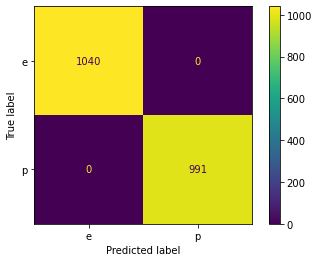

In [61]:
model = LogisticRegression(random_state=42)

model.fit(X_train_enc,y_train)

plot_confusion_matrix(model, X_test_enc, y_test);

In [64]:
model_accuracy = accuracy_score(y_test, model.predict(X_test_enc))
model_recall = recall_score(y_test, model.predict(X_test_enc),pos_label="e")
model_precision = precision_score(y_test, model.predict(X_test_enc),pos_label="e")
model_f1 = f1_score(y_test, model.predict(X_test_enc),pos_label="e")

In [65]:
print(f"""
Accuracy
Baseline: {baseline_accuracy:1.3f} Fitted Model: {model_accuracy:1.3f}
Recall
Baseline: {baseline_recall:1.3f} Fitted Model: {model_recall:1.3f}
Precision
Baseline: {baseline_precision:1.3f} Fitted Model: {model_precision:1.3f}
F1 Score
Baseline: {baseline_f1:1.3f} Fitted Model: {model_f1:1.3f}
""")



Accuracy
Baseline: 0.530 Fitted Model: 1.000
Recall
Baseline: 0.544 Fitted Model: 1.000
Precision
Baseline: 0.541 Fitted Model: 1.000
F1 Score
Baseline: 0.543 Fitted Model: 1.000

